<a href="https://colab.research.google.com/github/AidarZhumekenov/ML-labs/blob/master/Sigmoid%20prime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np


k = 1
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return x*(1-x) 
    
#sigmoid(x)*(1.0-sigmoid(x)) ОШИБКА БЫЛА ТУТ
#x*(1-x)  Поправил на дериватив сигмоиды по x

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

In [25]:
import numpy as np


class NeuralNetwork:

    def __init__(self, layers):
        self.activation = sigmoid
        self.activation_prime = sigmoid_prime

        # self.activation = tanh
        # self.activation_prime = tanh_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            # we have to start at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)
                print (deltas)

    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])

    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))

[[-0.08167356  0.5995813  -0.92093544]
 [ 0.39648182  0.09081677  0.08050111]
 [ 0.82238099  0.43980784  0.02103579]]
[[-0.25326116]
 [ 0.5232192 ]
 [-0.8092265 ]]
epochs: 0
[array([-0.00787959,  0.01484497, -0.02173644]), array([0.12755894])]
epochs: 10000
[array([-0.0294592 ,  0.01465323, -0.05122169]), array([0.06299404])]
epochs: 20000
[array([ 1.27197492e-03, -2.91344971e-06,  3.78804954e-03]), array([-0.00379588])]
epochs: 30000
[array([-0.00025712,  0.00035783, -0.00114942]), array([0.00181667])]
epochs: 40000
[array([-0.00014663,  0.00024243, -0.00076686]), array([0.00124748])]
epochs: 50000
[array([ 2.09499118e-04, -3.60267120e-07,  6.87594046e-04]), array([-0.00072444])]
epochs: 60000
[array([ 3.18345141e-04, -2.94285757e-04,  9.20402186e-06]), array([-0.0005831])]
epochs: 70000
[array([-2.32457959e-04,  6.95689913e-05, -2.69531371e-04]), array([0.00021444])]
epochs: 80000
[array([-1.96324794e-04,  5.87287977e-05, -2.24254043e-04]), array([0.00017815])]
epochs: 90000
[array([

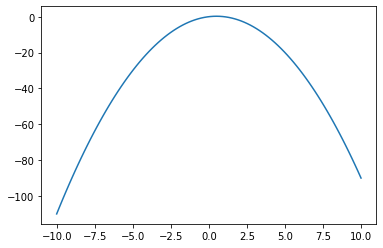

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-10.0,10.0,100)
sig = sigmoid_prime(x)
plt.plot(x,sig)